## Following section tests dynamic normalisation, rgb and grayscale

In [2]:
# from PIL import Image
import sys 
import os
# import torchvision.transforms as transforms
# import numpy as np
# import time
sys.path.append(os.path.abspath("kx59/pytorch-CycleGAN-and-pix2pix/data"))
from image_folder import default_loader
from image_folder import make_dataset, dynamic_normalisation

ModuleNotFoundError: No module named 'torch'

In [3]:
trainA = '/home/arid/kx59/pytorch-CycleGAN-and-pix2pix/datasets/datasetSS1to4_256/trainA'
trainB = '/home/arid/kx59/pytorch-CycleGAN-and-pix2pix/datasets/datasetSS1to4_256/trainB'


In [3]:
trainAimgs = make_dataset(trainA)
trainBimgs = make_dataset(trainB)
imgs = trainAimgs+trainBimgs

In [6]:
statsTotal,statsA,statsB = dynamic_normalisation(trainAimgs,trainBimgs)

Calculating normalisation stats
Total time taken for dyno calculation: 306.294894 seconds
Time taken per image for dyno calculation: 0.008508 seconds


In [7]:
print(statsTotal)
print(statsA)
print(statsB)

{'mean': [0.33898773522468945, 0.43922182158596773, 0.46362642619974015], 'std': [0.1837429598664673, 0.16728756753027332, 0.1642846120904203]}
{'mean': [0.4038459569860291, 0.43254086668396186, 0.43852846199979206], 'std': [0.1855131465458865, 0.1830652254996304, 0.1798683103921657]}
{'mean': [0.27412951346335, 0.4459027764879736, 0.4887243903996883], 'std': [0.15714529971025776, 0.1495597319468146, 0.1427110467480163]}


In [8]:
statsGrayTotal,statsGrayA,statsGrayB = dynamic_normalisation(trainAimgs,trainBimgs,grayscale=True)

Calculating normalisation stats
Total time taken for dyno calculation: 177.247936 seconds
Time taken per image for dyno calculation: 0.004924 seconds


In [9]:
print(statsGrayTotal)
print(statsGrayA)
print(statsGrayB)

{'mean': [0.4120065009256334, 0.4120065009256334, 0.4120065009256334], 'std': [0.16692236275377945, 0.16692236275377945, 0.16692236275377945]}
{'mean': [0.424594694781667, 0.424594694781667, 0.424594694781667], 'std': [0.1823695068825368, 0.1823695068825368, 0.1823695068825368]}
{'mean': [0.39941830706959974, 0.39941830706959974, 0.39941830706959974], 'std': [0.1488307364366179, 0.1488307364366179, 0.1488307364366179]}


In [ ]:
def calculate_image_stats(paths, gray=False):
    images = []
    start_time = time.time()
    for path in paths:
        with Image.open(path) as image:
            if gray:
                image = image.convert('L') # convert to grayscale
            images.append(np.array(image)/255)
                

    mean = np.mean(images, axis=(0, 1, 2), dtype=np.float64) # calculate mean of all pixels. Will return individual stats for each channel
    std = np.std(images, axis=(0, 1, 2), dtype=np.float64) # calculate standard deviation of all pixels. Will return individual stats for each channel
    end_time = time.time()-start_time
    print(f'Time taken: {end_time} seconds')
    print(f'Time taken per image: {(end_time/len(paths))} seconds')
    del images
    return {'mean':mean, 'std':std}

## Next section checks the dimensions of saved intermediate images from CycleGAN model.

Note: All images are three channels, even if it was supposed to be grayscale, the single channel is copied to three channels

In [ ]:
outImgPath = '/scratch/kx59/arid/scratch_checkpoints/BS16_2gpuGrayscale/web/images/epoch001_fake_B.png' #BS16_2gpuGrayscale #in1out3
fake_B_img = Image.open(outImgPath, 'r')
print(fake_B_img.format)
display(fake_B_img)
fake_B_img = np.array(fake_B_img)
print(fake_B_img.shape)

In [ ]:
print(fake_B_img[0,0,:])

In [ ]:
real_A_ImgPath = '/scratch/kx59/arid/scratch_checkpoints/BS16_2gpuGrayscale/web/images/epoch001_real_A.png'
real_A_img = Image.open(real_A_ImgPath, 'r')
print(real_A_img.format)
display(real_A_img)
real_A_img = np.array(real_A_img)
print(real_A_img.shape)

In [ ]:
print(real_A_img[0,0,:])
truth_img = np.zeros_like(real_A_img[:,:,0])

test1 = (real_A_img[:,:,0]==real_A_img[:,:,1]).all() and (real_A_img[:,:,1]==real_A_img[:,:,2]).all()
print('Greyscale? %r' % test1)

In [ ]:
a = np.array([[1,2]])
b = np.array([[1,2]])
c = np.array([[1,2]])
print(a.shape, '\n', a)
print(b.shape, '\n', b)
print(c.shape, '\n', c)
test2 = (a==c).all() and (b==c).all()

print(test2)

## Below is experimenting with json file loading of norm stats

In [ ]:
import json
import torchvision.transforms as transforms
import numpy as np

# obj0, obj1, obj2 are created here...
mean = (0.6, 0.6, 0.6)
std = (0.5, 0.5, 0.5)

# Saving the objects:
with open('stats.json', 'w') as f:  # Python 3: open(..., 'wb')
    json.dump([mean, std], f)
    
with open('stats.pkl', 'a') as f:  # Python 3: open(..., 'wb')
    json.dump([mean, std], f)

del mean, std
try:
    print(mean)
except NameError as e:
    print(e)
try:
    print(std)
except NameError:
    print(f'Std not defined: {NameError}')

# Getting back the objects:
with open('stats.json', 'r') as f:  # Python 3: open(..., 'rb')
    mean, std = json.load(f)
    
print(f'mean = {mean}', f'std = {std}', sep = '\n')

norm = transforms.Normalize(mean,std)

In [21]:
# obj0, obj1, obj2 are created here...
# mean = np.array([0.6,0.6,0.6])
# std = np.array([0.5,0.5,0.5])
import json
# import torchvision.transforms as transforms


# Saving the objects:
with open('stats.json', 'w') as f:
    json.dump((statsTotal,statsA,statsB), f)

del statsTotal,statsA,statsB
try:
    print(statsTotal)
except NameError as e:
    print(e)
try:
    print(statsA)
except NameError as e:
    print(e)
try:
    print(statsB)
except NameError as e:
    print(e)
    
# Getting back the objects:
with open('stats.json', 'r') as f:
    statsTotal,statsA,statsB = json.load(f)
    
print(statsTotal)
print(statsA)
print(statsB)

name 'statsTotal' is not defined
name 'statsA' is not defined
name 'statsB' is not defined
{'mean': [0.33898773522468945, 0.43922182158596773, 0.46362642619974015], 'std': [0.1837429598664673, 0.16728756753027332, 0.1642846120904203]}
{'mean': [0.4038459569860291, 0.43254086668396186, 0.43852846199979206], 'std': [0.1855131465458865, 0.1830652254996304, 0.1798683103921657]}
{'mean': [0.27412951346335, 0.4459027764879736, 0.4887243903996883], 'std': [0.15714529971025776, 0.1495597319468146, 0.1427110467480163]}


# The next section tests Color Jitter with different relative saturation scale factor

In [4]:
import numpy as np
from PIL import Image
# import torchvision.transforms as transforms


In [20]:
RelativeSaturationA = np.std(statsA['mean'])
RelativeSaturationB = np.std(statsB['mean'])
print(RelativeSaturationA,RelativeSaturationB)
SatScaleA = (RelativeSaturationB/RelativeSaturationA)
SatScaleB = 1/SatScaleA
print(SatScaleA,SatScaleB)

0.015136876583248094 0.09273061685180876
6.126139454320007 0.16323493897854774


In [22]:
if SatScaleA>1:
    jit_transform_A = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=[0.5*SatScaleA,SatScaleA], hue=0)
    jit_transform_B = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=[0.5,1], hue=0.5)
else:
    jit_transform_A = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=[0.5,1], hue=0.5)
    jit_transform_B = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=[0.5*SatScaleB,SatScaleB], hue=0)

JPEG


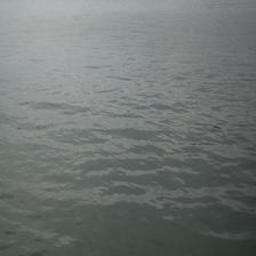

JPEG


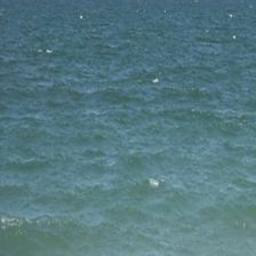

In [91]:
real_A_img = Image.open(trainAimgs[9259], 'r')
print(real_A_img.format)
display(real_A_img)
real_B_img = Image.open(trainBimgs[9570], 'r')
print(real_B_img.format)
display(real_B_img)
# hsv = np.array(real_B_img.convert('HSV'))
# print(np.min(hsv[:,:,0]))

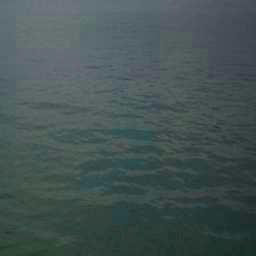

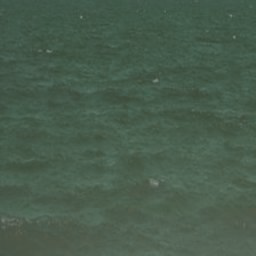

In [107]:
jit_img = jit_transform_A(real_A_img)
display(jit_img)
jit_img = jit_transform_B(real_B_img)
# hsv = np.array(jit_img.convert('HSV'))
display(jit_img)
# print(np.max(hsv[:,:,0])